In [68]:
import pandas as pd
import numpy as np
#os.chdir('/home/joyvan/Project_1030')
# census = pd.read_csv('./data/merge.csv')
# cp_2017 = pd.read_csv('./data/NNDSS_-_Table_II._Tetanus_to_Varicella.csv')
# cp_2014 = pd.read_csv('./data/NNDSS_-_Table_II._Varicella_to_West_Nile_virus_disease.csv')
# vaccrates = pd.read_csv('./data/state_vacc_cov.csv')

states_dict = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

#CENSUS DATA:

def gen_csv(df):
    df = df.drop('GEO.id', axis=1)
    df = df.drop('GEO.id2', axis=1)
    df.rename(columns={'GEO.display-label':'state'}, inplace=True)
    df = df[df.state.isin(list(states_dict.keys()))]
    return df

c_race_2010 = pd.read_csv('./data/2010_Census_Data/race.csv')
c_race_2000 = pd.read_csv('./data/2000_Census_Data/race.csv')

c_race_2010 = c_race_2010.drop('D001', axis = 1)

c_race_2010 = gen_csv(c_race_2010)
c_race_2000 = gen_csv(c_race_2000)

cols = ['state', 'white_alone', 'black_alone', 'AI_AN_alone', 'asian_alone',
       'PI_alone','other_race_alone','mult_races']
keep_2000 = ['state', 'VD03', 'VD04', 'VD05', 'VD06', 'VD07', 'VD08', 'VD09']
c_race_2000 = c_race_2000[keep_2000]
c_race_2010.columns = cols
c_race_2000.columns = cols


# c_housing_2010 = gen_csv(pd.read_csv('./data/2010_Census_Data/pop_by_housing.csv'))
# c_housing_2000 = gen_csv(pd.read_csv('./data/2000_Census_Data/pop_by_housing.csv'))

# print(c_housing_2010.columns)
# print(c_housing_2000.columns)

#lack the expertise to combine these datasets, given that owner occupied may be ambiguous 

c_housesize_2010 = gen_csv(pd.read_csv('./data/2010_Census_Data/household_size.csv'))
c_housesize_2000 = gen_csv(pd.read_csv('./data/2000_Census_Data/household_size.csv'))
cols = ['state','total_households', '1_person_household','2_person_household',
        '3_person_household','4_person_household','5_person_household',
        '6_person_household','7_more_person_household']
c_housesize_2010.columns = cols
c_housesize_2000.columns = cols

c_avghousesize_2010 = gen_csv(pd.read_csv('./data/2010_Census_Data/avg_household_size.csv'))
c_avghousesize_2000 = gen_csv(pd.read_csv('./data/2000_Census_Data/avg_household_size.csv'))
cols = ['state', 'total_avg_size','owner_avg_size','renter_avg_size']
c_avghousesize_2010.columns = cols
c_avghousesize_2000.columns = cols

#excluding tribe data due to column mismatch I lack the expertise to resolve

c_age_sex_2010 = gen_csv(pd.read_csv('./data/2010_Census_Data/avg_age_by_sex.csv'))
c_age_sex_2000 = gen_csv(pd.read_csv('./data/2000_Census_Data/avg_age_by_sex.csv'))
cols = ['state','avg_age','avg_age_male','avg_age_female']
c_age_sex_2010 = c_age_sex_2010.drop('POPGROUP.id', axis = 1)
c_age_sex_2010 = c_age_sex_2010.drop('POPGROUP.display-label', axis = 1)
c_age_sex_2000 = c_age_sex_2000.drop('POPGROUP.id', axis = 1)
c_age_sex_2000 = c_age_sex_2000.drop('POPGROUP.display-label', axis = 1)
c_age_sex_2010.columns = cols
c_age_sex_2000.columns = cols

from functools import reduce
dfs2010 = [c_race_2010,c_housesize_2010,c_avghousesize_2010,c_age_sex_2010]
dfs2000 = [c_race_2000,c_housesize_2000,c_avghousesize_2000,c_age_sex_2000]
census_dfs_2010 = reduce(lambda left,right: pd.merge(left,right,on='state'), dfs2010)
census_dfs_2000 = reduce(lambda left,right: pd.merge(left,right,on='state'), dfs2000)

# print(census_dfs_2000.head())
# import re
# for c in census_dfs_2010.columns:
#     census_dfs_2010[c].apply(lambda x:re.sub(r" ?\([^)]+\)", "",x))
#     census_dfs_2000[c].apply(lambda x:re.sub(r" ?\([^)]+\)", "",x))

In [87]:
#vaccination rates

#for each: keep only % column, title column with year, discard rows not in state dict
dates = [1999, 2001, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
        2014, 2015, 2016, 2017]
vrate_dfs = []
for d in dates:
    s = './data/varicella_data/vacc_rates_'+str(d)+'.csv'
    df = pd.read_csv(s)
    df.columns = ['state', 'n', 'perc_vacc_'+str(d), 'CI']
    df = df.drop('n', axis = 1)
    df = df.drop('CI', axis = 1)
    df = df[df.state.isin(list(states_dict.keys()))]
    df['state'] = df['state'].map(lambda x: x + '_' + str(d))
    df.columns = ['state','perc_vacc']
    
    vrate_dfs.append(df)
    
#vrate_df = reduce(lambda left,right: pd.merge(left,right,on='state'), vrate_dfs)
vrate_dfs[1].head()

,state,perc_vacc
0,Alabama_2001,89.2
1,Alaska_2001,61.4
2,Arizona_2001,74.9
3,Arkansas_2001,82.4
4,California_2001,82.2


In [88]:
import re
print(census_dfs_2010.columns)
def refined_df(df):
    for c in df.columns:
        df[c] = df[c].map(lambda x: str(x))
        df[c] = df[c].map(lambda x: re.sub(r" ?\([^)]+\)", "", x))
        if c != 'state':
            df[c] = df[c].map(lambda x: float(x))
refined_df(census_dfs_2010)
refined_df(census_dfs_2000)
census_dfs_2000.head()

Index(['state', 'white_alone', 'black_alone', 'AI_AN_alone', 'asian_alone',
       'PI_alone', 'other_race_alone', 'mult_races', 'total_households',
       '1_person_household', '2_person_household', '3_person_household',
       '4_person_household', '5_person_household', '6_person_household',
       '7_more_person_household', 'total_avg_size', 'owner_avg_size',
       'renter_avg_size', 'avg_age', 'avg_age_male', 'avg_age_female'],
      dtype='object')


,state,white_alone,black_alone,AI_AN_alone,asian_alone,PI_alone,other_race_alone,mult_races,total_households,1_person_household,...,4_person_household,5_person_household,6_person_household,7_more_person_household,total_avg_size,owner_avg_size,renter_avg_size,avg_age,avg_age_male,avg_age_female
0,Alabama,3162808.0,1155930.0,22430.0,31346.0,1409.0,28998.0,44179.0,1737080.0,453898.0,...,245212.0,97142.0,30509.0,16069.0,2.49,2.57,2.30,35.8,34.4,37.2
1,Alaska,434534.0,21787.0,98043.0,25116.0,3309.0,9997.0,34146.0,221600.0,52060.0,...,34348.0,16714.0,6993.0,5349.0,2.74,2.89,2.49,32.4,32.4,32.5
2,Arizona,3873611.0,158873.0,255879.0,92236.0,6733.0,596774.0,146526.0,1901327.0,472006.0,...,246143.0,130223.0,58202.0,48364.0,2.64,2.69,2.53,34.2,32.9,35.5
3,Arkansas,2138598.0,418950.0,17808.0,20220.0,1668.0,40412.0,35744.0,1042696.0,266585.0,...,140590.0,58463.0,19536.0,11252.0,2.49,2.54,2.40,36.0,34.6,37.4
4,California,20170059.0,2263882.0,333346.0,3697513.0,116961.0,5682241.0,1607646.0,11502870.0,2708308.0,...,1707961.0,927539.0,450920.0,457878.0,2.87,2.93,2.79,33.3,32.2,34.4


In [89]:
outbreak_df = pd.read_csv('./data/varicella_data/varicella_outbreaks.csv')
outbreak_df = outbreak_df.drop('Outbreaks_1994', axis = 1)
outbreak_df = outbreak_df.drop('Outbreaks_1993', axis = 1)
outbreak_df = outbreak_df.drop('Outbreaks_2018', axis = 1)
outbreak_df = outbreak_df.drop('Outbreaks_2002', axis = 1)
outbreak_df['State'] = outbreak_df['State'].map({v: k for k, v in states_dict.items()}).astype(str)
outbreak_df.head()

,State,Outbreaks_1999,Outbreaks_2000,Outbreaks_2001,Outbreaks_2003,Outbreaks_2004,Outbreaks_2005,Outbreaks_2006,Outbreaks_2007,Outbreaks_2008,Outbreaks_2009,Outbreaks_2010,Outbreaks_2011,Outbreaks_2012,Outbreaks_2013,Outbreaks_2014,Outbreaks_2015,Outbreaks_2016,Outbreaks_2017
0,Maine,45,1270,146,1012,363,331,238,357,269,235,247,226,258,140,207,233,228,198
1,New Hampshire,NN,NN,NN,-,-,337,419,374,280,202,162,158,142,104,112,96,85,81
2,Vermont,NN,NN,149,930,413,693,790,380,323,112,130,117,145,100,118,33,50,62
3,Massachusetts,427,195,1093,1993,2656,2214,1142,-,-,4,258,513,534,510,470,365,288,386
4,Rhode Island,25,12,9,5,-,N,-,-,-,57,46,42,80,39,54,53,52,74


In [106]:
# for c in census.columns:
#     census[c] = census[c].str.replace('Z','0').str.replace('%','').
#     str.replace(',','').str.replace('$','').astype(float)
# census
for c in outbreak_df.columns:
    outbreak_df[c] = outbreak_df[c].replace('-','0')
    outbreak_df[c] = outbreak_df[c].replace('NN',np.nan)
    outbreak_df[c] = outbreak_df[c].replace('N',np.nan)
    outbreak_df[c] = outbreak_df[c].replace('NA',np.nan)
    outbreak_df[c] = outbreak_df[c].replace('U',np.nan)
outbreak_df.head()
outbreak_df.columns = outbreak_df.columns[1:].insert(0, 'state')
#now, since this is the target variable, we can't replace the missing values.
outbreak_years = []
cols = outbreak_df.columns[1:]
print(cols)
for c, d in zip(cols, dates):
    df = outbreak_df[['state',c]]
    df['state'] = df['state'].map(lambda x: x + '_' + str(d))
    df.columns = ['state','n_outbreaks']
    outbreak_years.append(df)
    
print(outbreak_years[1].head())
    

Index(['Outbreaks_1999', 'Outbreaks_2000', 'Outbreaks_2001', 'Outbreaks_2003',
       'Outbreaks_2004', 'Outbreaks_2005', 'Outbreaks_2006', 'Outbreaks_2007',
       'Outbreaks_2008', 'Outbreaks_2009', 'Outbreaks_2010', 'Outbreaks_2011',
       'Outbreaks_2012', 'Outbreaks_2013', 'Outbreaks_2014', 'Outbreaks_2015',
       'Outbreaks_2016', 'Outbreaks_2017'],
      dtype='object')
                state n_outbreaks
0          Maine_2001        1270
1  New Hampshire_2001         NaN
2        Vermont_2001         NaN
3  Massachusetts_2001         195
4   Rhode Island_2001          12


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [107]:
slices_by_year = []

k = 0
for i,j in zip(vrate_dfs, outbreak_years):
    i['state'].astype(str)
    j['state'].astype(str)
    df = j.merge(i, on = 'state')
    if k < 7:
        tmp = census_dfs_2000.copy()
    else:
        tmp = census_dfs_2010.copy()
    d = dates[k]
    tmp['state'] = tmp['state'].map(lambda x: x + '_' + str(d))
    df = df.merge(tmp, on = 'state')
    df = df.dropna(axis = 0)
    k = k + 1
    slices_by_year.append(df)

#1999-2005 : use 2000 census data (indexes 0,1,2,3,4,5,6)
#2006-2017: use 2010 census (index 7 onward)
slices_by_year[1].head()

,state,n_outbreaks,perc_vacc,white_alone,black_alone,AI_AN_alone,asian_alone,PI_alone,other_race_alone,mult_races,...,4_person_household,5_person_household,6_person_household,7_more_person_household,total_avg_size,owner_avg_size,renter_avg_size,avg_age,avg_age_male,avg_age_female
0,Maine_2001,1270,62.2,1236014.0,6760.0,7098.0,9111.0,382.0,2911.0,12647.0,...,69418.0,25602.0,7253.0,2931.0,2.39,2.54,2.03,38.6,37.6,39.6
3,Massachusetts_2001,195,83.2,5367286.0,343454.0,15015.0,238124.0,2489.0,236724.0,146005.0,...,353184.0,154831.0,50905.0,26020.0,2.51,2.72,2.17,36.5,35.4,37.7
4,Rhode Island_2001,12,89.1,891191.0,46908.0,5121.0,23665.0,567.0,52616.0,28251.0,...,57638.0,24253.0,7804.0,3963.0,2.47,2.66,2.19,36.7,35.4,38.0
9,Ohio_2001,1192,70.8,9645453.0,1301307.0,24486.0,132633.0,2749.0,88627.0,157885.0,...,612614.0,269997.0,88970.0,44464.0,2.49,2.62,2.19,36.2,34.9,37.5
12,Michigan_2001,8809,77.5,7966053.0,1412742.0,58479.0,176510.0,2692.0,129552.0,192416.0,...,542690.0,249366.0,89020.0,52218.0,2.56,2.67,2.24,35.5,34.3,36.6


In [108]:
cleaned_data = pd.concat(slices_by_year, axis = 0)
cleaned_data = cleaned_data.reset_index(drop = True)
cleaned_data.head()

,state,n_outbreaks,perc_vacc,white_alone,black_alone,AI_AN_alone,asian_alone,PI_alone,other_race_alone,mult_races,...,4_person_household,5_person_household,6_person_household,7_more_person_household,total_avg_size,owner_avg_size,renter_avg_size,avg_age,avg_age_male,avg_age_female
0,Maine_1999,45,43.7,1236014.0,6760.0,7098.0,9111.0,382.0,2911.0,12647.0,...,69418.0,25602.0,7253.0,2931.0,2.39,2.54,2.03,38.6,37.6,39.6
1,Massachusetts_1999,427,65.0,5367286.0,343454.0,15015.0,238124.0,2489.0,236724.0,146005.0,...,353184.0,154831.0,50905.0,26020.0,2.51,2.72,2.17,36.5,35.4,37.7
2,Rhode Island_1999,25,78.4,891191.0,46908.0,5121.0,23665.0,567.0,52616.0,28251.0,...,57638.0,24253.0,7804.0,3963.0,2.47,2.66,2.19,36.7,35.4,38.0
3,Ohio_1999,1307,52.5,9645453.0,1301307.0,24486.0,132633.0,2749.0,88627.0,157885.0,...,612614.0,269997.0,88970.0,44464.0,2.49,2.62,2.19,36.2,34.9,37.5
4,Illinois_1999,13846,45.4,9125471.0,1876875.0,31006.0,423603.0,4610.0,722712.0,235016.0,...,660575.0,330510.0,128726.0,95554.0,2.63,2.76,2.37,34.7,33.3,36.0


In [113]:
cleaned_data.to_csv(r'./data/clean_data.csv')

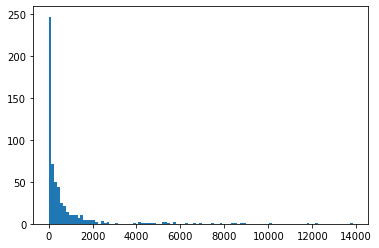

In [112]:
import matplotlib.pyplot as plt
np.histogram(cleaned_data['n_outbreaks'].astype(int))
plt.hist(cleaned_data['n_outbreaks'].astype(int), bins='auto')
plt.show()